# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [71]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [73]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [74]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [75]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.017149607938732093


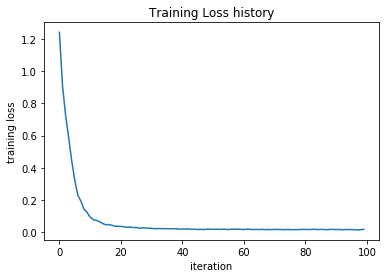

In [81]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [82]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [83]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

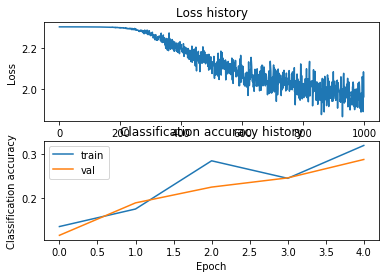

In [84]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

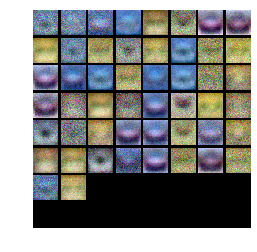

In [85]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [93]:
best_net = None # store the best model into this 
result ={}
best_acc = -1
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

hidden_size = [20,40,60,80,100,150]

learning_rate = np.linspace(1e-4,1e-2,num=10)

reg = np.linspace(0.1,1, num=10)

for hs in hidden_size:
    for lr in learning_rate:
        for r in reg:
            nn = TwoLayerNet(input_size,hs,num_classes)
            loss = nn.train(X_train,y_train, X_val, y_val, learning_rate=lr,reg = r,num_iters = 1000, batch_size=100,verbose=True)
            
            acc = loss["val_acc_history"][-1]
            result[alpha,lr,r]= acc
            if acc > best_acc:
                best_acc = acc
                best_net = nn
                
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


iteration 0 / 1000: loss 2.302634
iteration 100 / 1000: loss 2.302532
iteration 200 / 1000: loss 2.300557
iteration 300 / 1000: loss 2.276699
iteration 400 / 1000: loss 2.180024
iteration 500 / 1000: loss 2.195113
iteration 600 / 1000: loss 2.105478
iteration 700 / 1000: loss 2.103226
iteration 800 / 1000: loss 2.096196
iteration 900 / 1000: loss 1.992540
iteration 0 / 1000: loss 2.302691
iteration 100 / 1000: loss 2.302039
iteration 200 / 1000: loss 2.293725
iteration 300 / 1000: loss 2.258001
iteration 400 / 1000: loss 2.218438
iteration 500 / 1000: loss 2.063436
iteration 600 / 1000: loss 2.092528
iteration 700 / 1000: loss 2.034430
iteration 800 / 1000: loss 2.038025
iteration 900 / 1000: loss 2.065875
iteration 0 / 1000: loss 2.302766
iteration 100 / 1000: loss 2.302566
iteration 200 / 1000: loss 2.300899
iteration 300 / 1000: loss 2.275246
iteration 400 / 1000: loss 2.229135
iteration 500 / 1000: loss 2.142119
iteration 600 / 1000: loss 2.098904
iteration 700 / 1000: loss 2.02017

iteration 900 / 1000: loss 1.588954
iteration 0 / 1000: loss 2.302818
iteration 100 / 1000: loss 2.015651
iteration 200 / 1000: loss 1.673429
iteration 300 / 1000: loss 1.931155
iteration 400 / 1000: loss 1.681747
iteration 500 / 1000: loss 1.842464
iteration 600 / 1000: loss 1.520082
iteration 700 / 1000: loss 2.155832
iteration 800 / 1000: loss 1.804063
iteration 900 / 1000: loss 1.767253
iteration 0 / 1000: loss 2.302896
iteration 100 / 1000: loss 1.991712
iteration 200 / 1000: loss 1.643755
iteration 300 / 1000: loss 1.872435
iteration 400 / 1000: loss 1.729271
iteration 500 / 1000: loss 1.790247
iteration 600 / 1000: loss 1.812922
iteration 700 / 1000: loss 1.876289
iteration 800 / 1000: loss 1.830062
iteration 900 / 1000: loss 1.906064
iteration 0 / 1000: loss 2.302953
iteration 100 / 1000: loss 1.995606
iteration 200 / 1000: loss 1.902694
iteration 300 / 1000: loss 1.886803
iteration 400 / 1000: loss 1.626355
iteration 500 / 1000: loss 1.747049
iteration 600 / 1000: loss 1.94250

/home/bhargav/cnn/assignment1/cs231n/classifiers/neural_net.py:105: RuntimeWarning: divide by zero encountered in log
  correct_probs = np.log(probs[np.arange(X.shape[0]),y])


iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss inf
iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
iteration 0 / 1000: loss 2.302712
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss inf
iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
iteration 0 / 1000: loss 2.302770
iteration 100 / 1000: loss 2.408025
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss inf
iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
iteration 0 / 1000: loss 2.302820
iteration 100 / 1000: loss inf
iteration 200 / 1000: los

/home/bhargav/cnn/assignment1/cs231n/classifiers/neural_net.py:100: RuntimeWarning: overflow encountered in subtract
  scores -= np.amax(scores,axis=1).reshape(-1,1)
/home/bhargav/cnn/assignment1/cs231n/classifiers/neural_net.py:85: RuntimeWarning: overflow encountered in matmul
  l2 = (np.matmul(l1,W2)+b2)
/home/bhargav/cnn/assignment1/cs231n/classifiers/neural_net.py:100: RuntimeWarning: invalid value encountered in subtract
  scores -= np.amax(scores,axis=1).reshape(-1,1)


iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.302719
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.302759
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.302841
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan

iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.303054
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.303128
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.303208
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.302

iteration 700 / 1000: loss 2.047720
iteration 800 / 1000: loss 1.964595
iteration 900 / 1000: loss 2.005791
iteration 0 / 1000: loss 2.303067
iteration 100 / 1000: loss 2.302804
iteration 200 / 1000: loss 2.300790
iteration 300 / 1000: loss 2.274555
iteration 400 / 1000: loss 2.180204
iteration 500 / 1000: loss 2.145996
iteration 600 / 1000: loss 2.078799
iteration 700 / 1000: loss 2.029413
iteration 800 / 1000: loss 1.980719
iteration 900 / 1000: loss 2.023388
iteration 0 / 1000: loss 2.303199
iteration 100 / 1000: loss 2.302592
iteration 200 / 1000: loss 2.296319
iteration 300 / 1000: loss 2.252389
iteration 400 / 1000: loss 2.205622
iteration 500 / 1000: loss 2.185618
iteration 600 / 1000: loss 2.090186
iteration 700 / 1000: loss 1.993064
iteration 800 / 1000: loss 2.078255
iteration 900 / 1000: loss 1.945176
iteration 0 / 1000: loss 2.303342
iteration 100 / 1000: loss 2.303039
iteration 200 / 1000: loss 2.300985
iteration 300 / 1000: loss 2.282951
iteration 400 / 1000: loss 2.21428

iteration 600 / 1000: loss 1.787245
iteration 700 / 1000: loss 2.181884
iteration 800 / 1000: loss 1.838500
iteration 900 / 1000: loss 1.999089
iteration 0 / 1000: loss 2.303431
iteration 100 / 1000: loss 1.911596
iteration 200 / 1000: loss 1.764126
iteration 300 / 1000: loss 1.963502
iteration 400 / 1000: loss 2.109594
iteration 500 / 1000: loss 1.820922
iteration 600 / 1000: loss 1.773946
iteration 700 / 1000: loss 1.798424
iteration 800 / 1000: loss 1.945812
iteration 900 / 1000: loss 1.806081
iteration 0 / 1000: loss 2.303590
iteration 100 / 1000: loss 1.960562
iteration 200 / 1000: loss 1.846880
iteration 300 / 1000: loss 1.953619
iteration 400 / 1000: loss 1.930665
iteration 500 / 1000: loss 1.942508
iteration 600 / 1000: loss 1.970912
iteration 700 / 1000: loss 1.810216
iteration 800 / 1000: loss 1.532237
iteration 900 / 1000: loss 2.039185
iteration 0 / 1000: loss 2.303700
iteration 100 / 1000: loss 1.856277
iteration 200 / 1000: loss 1.913478
iteration 300 / 1000: loss 1.83983

iteration 700 / 1000: loss inf
iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
iteration 0 / 1000: loss 2.302716
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.302830
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.302960
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan

iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.303477
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.303571
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.303710
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.303

iteration 900 / 1000: loss 1.863484
iteration 0 / 1000: loss 2.303113
iteration 100 / 1000: loss 2.302542
iteration 200 / 1000: loss 2.297395
iteration 300 / 1000: loss 2.237277
iteration 400 / 1000: loss 2.190520
iteration 500 / 1000: loss 2.126163
iteration 600 / 1000: loss 2.044991
iteration 700 / 1000: loss 2.033243
iteration 800 / 1000: loss 1.925447
iteration 900 / 1000: loss 2.073193
iteration 0 / 1000: loss 2.303335
iteration 100 / 1000: loss 2.302829
iteration 200 / 1000: loss 2.297373
iteration 300 / 1000: loss 2.255135
iteration 400 / 1000: loss 2.116459
iteration 500 / 1000: loss 2.129561
iteration 600 / 1000: loss 2.105915
iteration 700 / 1000: loss 2.022133
iteration 800 / 1000: loss 1.968684
iteration 900 / 1000: loss 2.073640
iteration 0 / 1000: loss 2.303498
iteration 100 / 1000: loss 2.302963
iteration 200 / 1000: loss 2.295020
iteration 300 / 1000: loss 2.275273
iteration 400 / 1000: loss 2.221837
iteration 500 / 1000: loss 2.046482
iteration 600 / 1000: loss 2.05683

iteration 800 / 1000: loss 2.151916
iteration 900 / 1000: loss 1.648351
iteration 0 / 1000: loss 2.303699
iteration 100 / 1000: loss 1.937168
iteration 200 / 1000: loss 1.737129
iteration 300 / 1000: loss 1.961232
iteration 400 / 1000: loss 1.787929
iteration 500 / 1000: loss 1.862378
iteration 600 / 1000: loss 1.668003
iteration 700 / 1000: loss 1.874001
iteration 800 / 1000: loss 1.894513
iteration 900 / 1000: loss 1.835701
iteration 0 / 1000: loss 2.303872
iteration 100 / 1000: loss 1.863992
iteration 200 / 1000: loss 1.989217
iteration 300 / 1000: loss 1.820657
iteration 400 / 1000: loss 1.931927
iteration 500 / 1000: loss 1.763019
iteration 600 / 1000: loss 1.851488
iteration 700 / 1000: loss 1.852462
iteration 800 / 1000: loss 2.071170
iteration 900 / 1000: loss 1.829871
iteration 0 / 1000: loss 2.304083
iteration 100 / 1000: loss 2.012389
iteration 200 / 1000: loss 1.892856
iteration 300 / 1000: loss 1.786953
iteration 400 / 1000: loss 1.828347
iteration 500 / 1000: loss 1.78358

iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss inf
iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
iteration 0 / 1000: loss 2.302779
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.302974
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.303159
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.303858
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.304049
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.304230
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan

iteration 400 / 1000: loss 2.096154
iteration 500 / 1000: loss 2.069471
iteration 600 / 1000: loss 2.064173
iteration 700 / 1000: loss 1.967267
iteration 800 / 1000: loss 1.956055
iteration 900 / 1000: loss 1.833373
iteration 0 / 1000: loss 2.303358
iteration 100 / 1000: loss 2.302625
iteration 200 / 1000: loss 2.298320
iteration 300 / 1000: loss 2.265908
iteration 400 / 1000: loss 2.182656
iteration 500 / 1000: loss 2.090473
iteration 600 / 1000: loss 2.107840
iteration 700 / 1000: loss 2.051185
iteration 800 / 1000: loss 1.961052
iteration 900 / 1000: loss 1.938949
iteration 0 / 1000: loss 2.303559
iteration 100 / 1000: loss 2.303088
iteration 200 / 1000: loss 2.296577
iteration 300 / 1000: loss 2.235264
iteration 400 / 1000: loss 2.163236
iteration 500 / 1000: loss 2.153444
iteration 600 / 1000: loss 2.060802
iteration 700 / 1000: loss 2.001532
iteration 800 / 1000: loss 1.964466
iteration 900 / 1000: loss 2.066399
iteration 0 / 1000: loss 2.303778
iteration 100 / 1000: loss 2.30335

iteration 300 / 1000: loss 1.685240
iteration 400 / 1000: loss 1.859363
iteration 500 / 1000: loss 1.783769
iteration 600 / 1000: loss 1.692611
iteration 700 / 1000: loss 1.847929
iteration 800 / 1000: loss 1.568029
iteration 900 / 1000: loss 1.889035
iteration 0 / 1000: loss 2.304050
iteration 100 / 1000: loss 1.864663
iteration 200 / 1000: loss 1.862880
iteration 300 / 1000: loss 1.889904
iteration 400 / 1000: loss 1.951253
iteration 500 / 1000: loss 1.817046
iteration 600 / 1000: loss 1.614342
iteration 700 / 1000: loss 1.778567
iteration 800 / 1000: loss 1.675677
iteration 900 / 1000: loss 1.741638
iteration 0 / 1000: loss 2.304276
iteration 100 / 1000: loss 1.892653
iteration 200 / 1000: loss 1.832681
iteration 300 / 1000: loss 1.710874
iteration 400 / 1000: loss 1.983958
iteration 500 / 1000: loss 1.856416
iteration 600 / 1000: loss 1.694382
iteration 700 / 1000: loss 1.838458
iteration 800 / 1000: loss 1.929165
iteration 900 / 1000: loss 1.944849
iteration 0 / 1000: loss 2.30453

iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
iteration 0 / 1000: loss 2.304999
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss inf
iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
iteration 0 / 1000: loss 2.302839
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.303083
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

iteration 0 / 1000: loss 2.304071
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.304302
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.304578
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.304815
iteration 100 / 1000: loss 

iteration 100 / 1000: loss 2.302259
iteration 200 / 1000: loss 2.293861
iteration 300 / 1000: loss 2.239140
iteration 400 / 1000: loss 2.222887
iteration 500 / 1000: loss 2.042585
iteration 600 / 1000: loss 2.097477
iteration 700 / 1000: loss 2.011423
iteration 800 / 1000: loss 1.906747
iteration 900 / 1000: loss 2.004724
iteration 0 / 1000: loss 2.303510
iteration 100 / 1000: loss 2.302629
iteration 200 / 1000: loss 2.294989
iteration 300 / 1000: loss 2.263711
iteration 400 / 1000: loss 2.185238
iteration 500 / 1000: loss 2.082362
iteration 600 / 1000: loss 2.094028
iteration 700 / 1000: loss 1.993231
iteration 800 / 1000: loss 1.926113
iteration 900 / 1000: loss 1.930964
iteration 0 / 1000: loss 2.303781
iteration 100 / 1000: loss 2.302768
iteration 200 / 1000: loss 2.296571
iteration 300 / 1000: loss 2.216447
iteration 400 / 1000: loss 2.146275
iteration 500 / 1000: loss 2.149659
iteration 600 / 1000: loss 2.119160
iteration 700 / 1000: loss 1.958954
iteration 800 / 1000: loss 1.973

iteration 0 / 1000: loss 2.304108
iteration 100 / 1000: loss 1.864511
iteration 200 / 1000: loss 1.683219
iteration 300 / 1000: loss 1.848610
iteration 400 / 1000: loss 1.960123
iteration 500 / 1000: loss 1.772650
iteration 600 / 1000: loss 2.087909
iteration 700 / 1000: loss 2.012781
iteration 800 / 1000: loss 1.819315
iteration 900 / 1000: loss 1.843139
iteration 0 / 1000: loss 2.304445
iteration 100 / 1000: loss 1.762839
iteration 200 / 1000: loss 1.857023
iteration 300 / 1000: loss 1.967418
iteration 400 / 1000: loss 1.708968
iteration 500 / 1000: loss 1.916712
iteration 600 / 1000: loss 2.104958
iteration 700 / 1000: loss 1.752139
iteration 800 / 1000: loss 1.704159
iteration 900 / 1000: loss 1.819090
iteration 0 / 1000: loss 2.304759
iteration 100 / 1000: loss 2.008774
iteration 200 / 1000: loss 1.757563
iteration 300 / 1000: loss 1.606007
iteration 400 / 1000: loss 2.083055
iteration 500 / 1000: loss 1.947026
iteration 600 / 1000: loss 1.745349
iteration 700 / 1000: loss 1.64663

iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss inf
iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
iteration 0 / 1000: loss 2.305678
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss inf
iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
iteration 0 / 1000: loss 2.302821
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.303190
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf

iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.304416
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.304751
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.305078
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan

iteration 700 / 1000: loss 2.043986
iteration 800 / 1000: loss 1.887286
iteration 900 / 1000: loss 1.987869
iteration 0 / 1000: loss 2.303575
iteration 100 / 1000: loss 2.302623
iteration 200 / 1000: loss 2.290053
iteration 300 / 1000: loss 2.261097
iteration 400 / 1000: loss 2.223385
iteration 500 / 1000: loss 2.061162
iteration 600 / 1000: loss 2.079652
iteration 700 / 1000: loss 1.968949
iteration 800 / 1000: loss 1.932680
iteration 900 / 1000: loss 1.854007
iteration 0 / 1000: loss 2.303981
iteration 100 / 1000: loss 2.303068
iteration 200 / 1000: loss 2.296900
iteration 300 / 1000: loss 2.242610
iteration 400 / 1000: loss 2.136185
iteration 500 / 1000: loss 2.141947
iteration 600 / 1000: loss 1.997478
iteration 700 / 1000: loss 2.047789
iteration 800 / 1000: loss 1.910362
iteration 900 / 1000: loss 1.948195
iteration 0 / 1000: loss 2.304422
iteration 100 / 1000: loss 2.303066
iteration 200 / 1000: loss 2.292342
iteration 300 / 1000: loss 2.198060
iteration 400 / 1000: loss 2.13901

iteration 600 / 1000: loss 1.587043
iteration 700 / 1000: loss 1.854896
iteration 800 / 1000: loss 1.666600
iteration 900 / 1000: loss 1.708983
iteration 0 / 1000: loss 2.304861
iteration 100 / 1000: loss 2.001034
iteration 200 / 1000: loss 1.736760
iteration 300 / 1000: loss 1.824151
iteration 400 / 1000: loss 1.910781
iteration 500 / 1000: loss 1.710423
iteration 600 / 1000: loss 1.725434
iteration 700 / 1000: loss 1.758044
iteration 800 / 1000: loss 1.967489
iteration 900 / 1000: loss 1.892078
iteration 0 / 1000: loss 2.305391
iteration 100 / 1000: loss 1.931299
iteration 200 / 1000: loss 1.747966
iteration 300 / 1000: loss 1.721452
iteration 400 / 1000: loss 1.692692
iteration 500 / 1000: loss 1.869050
iteration 600 / 1000: loss 1.854173
iteration 700 / 1000: loss 1.837678
iteration 800 / 1000: loss 1.616691
iteration 900 / 1000: loss 1.816450
iteration 0 / 1000: loss 2.305802
iteration 100 / 1000: loss 2.085748
iteration 200 / 1000: loss 2.027468
iteration 300 / 1000: loss 1.74306

iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
iteration 0 / 1000: loss 2.306811
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss inf
iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
iteration 0 / 1000: loss 2.307210
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss inf
iteration 800 / 1000: loss inf
iteration 900 / 1000: loss inf
iteration 0 / 1000: loss 2.302994
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss inf
iteration 600 / 1000: loss inf
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

iteration 0 / 1000: loss 2.304896
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.305353
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.305797
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss inf
iteration 300 / 1000: loss inf
iteration 400 / 1000: loss inf
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.306258
iteration 100 / 1000: loss 

In [120]:
for alpha, ls, reg in sorted(result):
    train_accuracy = result[alpha,lr, reg]
    print((alpha,lr, reg, train_accuracy))
# print(result)
print('best validation accuracy achieved during cross-validation: %f' % best_acc)
# Print your validation accuracy: this should be above 48%
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

(20, 0.01, 0.1, 0.087)
(20, 0.01, 0.2, 0.087)
(20, 0.01, 0.30000000000000004, 0.087)
(20, 0.01, 0.4, 0.087)
(20, 0.01, 0.5, 0.087)
(20, 0.01, 0.6, 0.087)
(20, 0.01, 0.7000000000000001, 0.087)
(20, 0.01, 0.8, 0.087)
(20, 0.01, 0.9, 0.087)
(20, 0.01, 1.0, 0.087)
(20, 0.01, 0.1, 0.087)
(20, 0.01, 0.2, 0.087)
(20, 0.01, 0.30000000000000004, 0.087)
(20, 0.01, 0.4, 0.087)
(20, 0.01, 0.5, 0.087)
(20, 0.01, 0.6, 0.087)
(20, 0.01, 0.7000000000000001, 0.087)
(20, 0.01, 0.8, 0.087)
(20, 0.01, 0.9, 0.087)
(20, 0.01, 1.0, 0.087)
(20, 0.01, 0.1, 0.087)
(20, 0.01, 0.2, 0.087)
(20, 0.01, 0.30000000000000004, 0.087)
(20, 0.01, 0.4, 0.087)
(20, 0.01, 0.5, 0.087)
(20, 0.01, 0.6, 0.087)
(20, 0.01, 0.7000000000000001, 0.087)
(20, 0.01, 0.8, 0.087)
(20, 0.01, 0.9, 0.087)
(20, 0.01, 1.0, 0.087)
(20, 0.01, 0.1, 0.087)
(20, 0.01, 0.2, 0.087)
(20, 0.01, 0.30000000000000004, 0.087)
(20, 0.01, 0.4, 0.087)
(20, 0.01, 0.5, 0.087)
(20, 0.01, 0.6, 0.087)
(20, 0.01, 0.7000000000000001, 0.087)
(20, 0.01, 0.8, 0.087)
(2

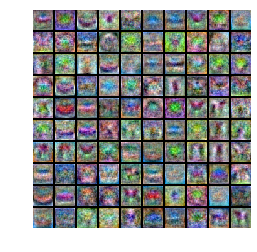

In [125]:
# Visualize the weights of the best network
show_net_weights(best_net)
# print(best_net.params)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [126]:
# Print your test accuracy: this should be above 48%
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.458


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$

